In [43]:
import pandas as pd
import seaborn as sns
import torch
from sklearn import preprocessing, pipeline, neural_network, metrics
from sklearn.base import clone
from sklearn.model_selection import train_test_split, cross_validate

In [11]:
X = torch.load('RAVDESS_whisper_medium_X.pt').numpy()
y = torch.load('RAVDESS_whisper_medium_y.pt').numpy()
X.shape, y.shape

((2452, 1024), (2452,))

In [41]:
estimator = pipeline.make_pipeline(
        preprocessing.StandardScaler(),
        neural_network.MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), learning_rate='adaptive'))

cv_result = cross_validate(
    estimator=estimator,
    X=X, y=y, cv=5, n_jobs=-1, scoring=["accuracy", "f1_macro", "recall_macro", "precision_macro"]
)

In [50]:
df = pd.DataFrame(cv_result).drop(columns=['fit_time', 'score_time'])
df

,test_accuracy,test_f1_macro,test_recall_macro,test_precision_macro
0,0.743381,0.745444,0.772897,0.743239
1,0.775967,0.771747,0.784333,0.764858
2,0.757143,0.763543,0.753377,0.788669
3,0.704082,0.727402,0.713823,0.759464
4,0.740816,0.753626,0.758175,0.767203


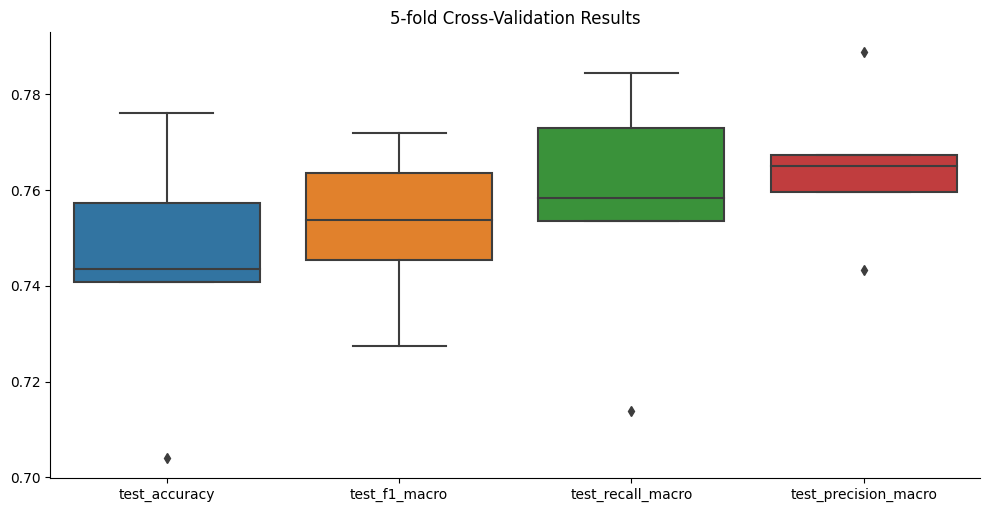

In [57]:
sns.catplot(data=df, kind='box', height=5, aspect=2).set(title='5-fold Cross-Validation Results').savefig('clf_eval.png')

# Hold-Out

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = clone(estimator).fit(X_train, y_train)
y_pred =
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        49
           1       0.85      0.86      0.85        84
           2       0.99      0.82      0.90        84
           3       0.76      0.86      0.81        71
           4       0.93      0.93      0.93        59
           5       0.85      0.87      0.86        69
           6       0.95      0.90      0.92        39
           7       0.97      0.97      0.97        36

    accuracy                           0.88       491
   macro avg       0.89      0.89      0.89       491
weighted avg       0.88      0.88      0.88       491

